In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [21]:
df_labevents = pd.read_csv('chartevents.csv')
df_labevents.head()

C:\Users\Nikhil\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,5296175,40177,198480,285750.0,220045,2169-05-11 21:00:00,2169-05-11 21:12:00,19891,65,65.0,bpm,0.0,0.0,NaN,NaN
1,5296176,40177,198480,285750.0,220179,2169-05-11 21:00:00,2169-05-11 21:12:00,19891,92,92.0,mmHg,0.0,0.0,NaN,NaN
2,5296177,40177,198480,285750.0,220180,2169-05-11 21:00:00,2169-05-11 21:12:00,19891,58,58.0,mmHg,0.0,0.0,NaN,NaN
3,5296178,40177,198480,285750.0,220181,2169-05-11 21:00:00,2169-05-11 21:12:00,19891,61,61.0,mmHg,0.0,0.0,NaN,NaN
4,5296179,40177,198480,285750.0,220210,2169-05-11 21:00:00,2169-05-11 21:12:00,19891,32,32.0,insp/min,0.0,0.0,NaN,NaN


In [22]:
df_labevents.shape
df_prescriptions.shape

NameError: name 'df_prescriptions' is not defined

In [23]:
df_labevents.VALUEUOM.value_counts()
#there are 3338 potential bsls
#there are 99 patients

mmHg        80918
BPM         33180
%           28478
insp/min    12210
kg          11455
bpm          9931
cmH2O        9417
L/min        4709
mL           4490
mEq/L        4350
cm           3752
Deg. C       3473
...          3398
mg/dL        3338
Deg. F       2679
?F           1977
points       1951
sec          1842
ml/hr        1811
ml/B         1777
torr         1236
g * m         987
g*m/m2        986
K/uL          866
number        800
lpm           740
ml/cmH        724
mg/dl         720
ml/min        648
units         619
            ...  
L/m           149
ng/mL         144
ml/dl         140
V-mA          133
m2            133
#             111
ml/m/m        106
ug/mL         100
g/dL           80
min            55
mL/beat        55
decFrc         53
L              42
inches         41
Inch           40
mA             21
ug/dL          10
pH              8
mOsm/kg         7
/min            5
ng              5
kcal/kg         5
g/kg            5
mV              3
pg/mL     

In [24]:
df_labevents.VALUEUOM.unique()

array(['bpm', 'mmHg', 'insp/min', '%', 'g/dl', 'K/uL', 'IU/L', 'mEq/L',
       'mg/dL', 'ng/mL', 'g/dL', 'units', 'mmol/L', '?F', 'L/min', nan,
       'cm', 'sec', 'cmH2O', 'mL', '?C', 'kg', 'ug/dL', 'ug/mL',
       'mOsm/kg', '#/uL', 'pg/mL', 'Inch', 'mL/beat', 'kcal/kg', 'g/kg',
       'BPM', 'number', 'lpm', 'Deg. C', 'Deg. F', 'm2', 'points', 'torr',
       '.', 'ml/B', 'ml/dl', 'mg/dl', 'inches', 'gm/dl', '/mic l',
       'ml/cmH', '...', 'kg x m', 'g * m', 'g*m/m2', 'kg * m', 'ml',
       'ml/min', 'ml/m/m', 'mA', 'cc/min', 'ml/hr', 'L', 'min', 'V-mA',
       'pH', 'decFrc', 'umol/L', 'L/m', '#', 'mV', '/min', 'ng', 'sum',
       'years', 'liters'], dtype=object)

In [25]:
bsl_events_mg = df_labevents.query('VALUEUOM == "mg/dl"')
bsl_events_g = df_labevents.query('VALUEUOM == "g/dl"')
bsl_events_meq = df_labevents.query('VALUEUOM == "mEq/L"')
bsl_events_mg.drop(['ERROR', 'RESULTSTATUS', 'STOPPED'], axis=1, inplace=True)
bsl_events_g.drop(['ERROR', 'RESULTSTATUS', 'STOPPED'], axis=1, inplace=True)
bsl_events_meq.drop(['ERROR', 'RESULTSTATUS', 'STOPPED'], axis=1, inplace=True)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
bsl_events_meq.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CGID,VALUENUM,WARNING
count,4.350000e+03,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,3638.000000
mean,1.968617e+07,37075.716782,154487.234023,247871.316782,188219.455172,19978.534943,40.963310,0.254535
std,2.940766e+07,12004.005902,26541.030736,27707.277613,82811.962007,2056.567405,51.177611,0.435660
min,5.279055e+06,10006.000000,100375.000000,201006.000000,827.000000,15331.000000,-29.000000,0.000000
25%,6.674269e+06,40310.000000,133283.000000,223177.000000,220602.000000,20889.000000,4.000000,0.000000
50%,6.807438e+06,41976.000000,163189.000000,242790.000000,224828.000000,20889.000000,16.000000,0.000000
75%,7.458842e+06,43746.000000,174997.000000,276601.000000,227442.000000,20889.000000,99.000000,1.000000
max,8.636499e+07,44228.000000,199395.000000,298685.000000,227464.000000,20889.000000,155.000000,1.000000


In [27]:
bsls_df = bsl_events_mg.append(bsl_events_g)

In [28]:
bsls_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING
38020,86025941,10065,183314,245091.0,1522,2189-09-09 03:25:00,2189-09-09 04:38:00,15331,8.3000001907348633,8.3,mg/dl,NaN
38412,86026710,10065,183314,245091.0,786,2189-09-10 01:04:00,2189-09-10 02:19:00,15331,7.6999998092651367,7.7,mg/dl,NaN
38432,86026730,10065,183314,245091.0,1522,2189-09-10 01:04:00,2189-09-10 02:19:00,15331,7.6999998092651367,7.7,mg/dl,NaN
38496,86025922,10065,183314,245091.0,786,2189-09-09 03:25:00,2189-09-09 04:38:00,15331,8.3000001907348633,8.3,mg/dl,NaN
40977,85837876,10029,132349,226055.0,786,2139-09-24 02:31:00,2139-09-24 04:00:00,15331,7.6999998092651367,7.7,mg/dl,NaN


In [29]:
bsls_df.shape

(1149, 12)

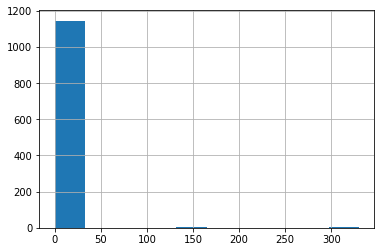

In [30]:
bsls_df.VALUENUM.hist();

In [31]:
bsls_corrected_df = bsls_df.query('VALUENUM < 100')

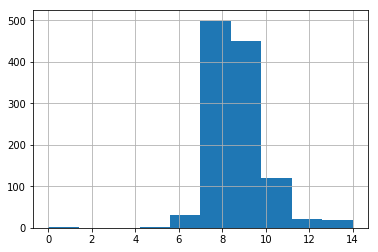

In [32]:
bsls_corrected_df.VALUENUM.hist()

In [34]:
bsls_corrected_df.dtypes

ROW_ID          int64
SUBJECT_ID      int64
HADM_ID         int64
ICUSTAY_ID    float64
ITEMID          int64
CHARTTIME      object
STORETIME      object
CGID            int64
VALUE          object
VALUENUM      float64
VALUEUOM       object
WARNING       float64
dtype: object

In [35]:
bsls_corrected_df.to_csv('bsls_mimic.csv', index=False)

In [36]:
df_bsls = pd.read_csv('bsls_mimic.csv')

In [37]:
df_bsls.describe().VALUENUM

count    1144.000000
mean        8.635664
std         1.163045
min         0.000000
25%         8.000000
50%         8.500000
75%         9.000000
max        14.000000
Name: VALUENUM, dtype: float64

In [15]:
df_bsls.dtypes

ROW_ID          int64
SUBJECT_ID      int64
HADM_ID         int64
ICUSTAY_ID    float64
ITEMID          int64
CHARTTIME      object
STORETIME      object
CGID            int64
VALUE         float64
VALUENUM      float64
VALUEUOM       object
WARNING       float64
dtype: object

In [39]:
df_bslsv1 = df_bsls.sort_values(by=['ICUSTAY_ID'], ascending=False)

In [40]:
df_bslsv1.to_csv('bsls_mimic.csv', index=False)

In [140]:
df_bslsv2 = pd.read_csv('bsls_mimic.csv')

In [141]:
df_bslsv2['CHARTTIME']=pd.to_datetime(df_bslsv2['CHARTTIME'])

In [142]:
df_bslsv2['STORETIME']=pd.to_datetime(df_bslsv2['STORETIME'])

In [143]:
df_bslsv2['ICUSTAY_ID'] = df_bslsv2['ICUSTAY_ID'].astype(str)

In [144]:
df_bslsv2 = df_bslsv2.sort_values(['ICUSTAY_ID','STORETIME'])

In [145]:
df_bslsv2 = df_bslsv2.drop_duplicates(subset=['SUBJECT_ID', 'ICUSTAY_ID', 'CHARTTIME', 'STORETIME'], keep=False)

In [146]:
df_bslsv2['time_since_previous'] = df_bslsv2['STORETIME'] - df_bslsv2.groupby('SUBJECT_ID')['STORETIME'].shift(1)

In [147]:
df_bslsv2['time_until_next'] = df_bslsv2.groupby('SUBJECT_ID')['STORETIME'].shift(1) - df_bslsv2['STORETIME']

In [148]:
df_bslsv2.head(20)

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,time_since_previous,time_until_next
1124,6816273,42321,114648,201204.0,220228,2121-12-07 20:46:00,2121-12-07 21:34:00,20889,8.9,8.9,g/dl,1.0,NaT,NaT
1125,6816382,42321,114648,201204.0,220228,2121-12-08 04:58:00,2121-12-08 05:25:00,20889,9.7,9.7,g/dl,1.0,0 days 07:51:00,-1 days +16:09:00
1123,6816625,42321,114648,201204.0,220228,2121-12-09 02:08:00,2121-12-09 02:42:00,20889,8.6,8.6,g/dl,1.0,0 days 21:17:00,-1 days +02:43:00
1086,5391504,40310,157609,204132.0,220228,2144-12-24 23:25:00,2144-12-24 23:59:00,20889,11.4,11.4,g/dl,1.0,NaT,NaT
1087,5391676,40310,157609,204132.0,220228,2144-12-25 09:18:00,2144-12-25 09:58:00,20889,10.8,10.8,g/dl,1.0,0 days 09:59:00,-1 days +14:01:00
1088,5391919,40310,157609,204132.0,220228,2144-12-26 04:25:00,2144-12-26 05:02:00,20889,11.0,11.0,g/dl,1.0,0 days 19:04:00,-1 days +04:56:00
1084,5392145,40310,157609,204132.0,220228,2144-12-27 02:31:00,2144-12-27 04:30:00,20889,12.8,12.8,g/dl,1.0,0 days 23:28:00,-1 days +00:32:00
1089,5392325,40310,157609,204132.0,220228,2144-12-28 01:16:00,2144-12-28 02:11:00,20889,12.0,12.0,g/dl,1.0,0 days 21:41:00,-1 days +02:19:00
1085,5392572,40310,157609,204132.0,220228,2144-12-29 05:06:00,2144-12-29 05:36:00,20889,13.7,13.7,g/dl,1.0,1 days 03:25:00,-2 days +20:35:00
1090,5392790,40310,157609,204132.0,220228,2144-12-30 04:40:00,2144-12-30 05:18:00,20889,12.9,12.9,g/dl,1.0,0 days 23:42:00,-1 days +00:18:00


In [149]:
#goal is to sort table by icu stay ID
#then to sort it by ascending to descending
#then to look at the interval in between

In [150]:
df_bslsv2 = df_bslsv2[df_bslsv2.time_since_previous != 'NaT']

In [151]:
df_bsls = df_bslsv2

In [152]:
df_bsls.head(10)

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,time_since_previous,time_until_next
1124,6816273,42321,114648,201204.0,220228,2121-12-07 20:46:00,2121-12-07 21:34:00,20889,8.9,8.9,g/dl,1.0,NaT,NaT
1125,6816382,42321,114648,201204.0,220228,2121-12-08 04:58:00,2121-12-08 05:25:00,20889,9.7,9.7,g/dl,1.0,0 days 07:51:00,-1 days +16:09:00
1123,6816625,42321,114648,201204.0,220228,2121-12-09 02:08:00,2121-12-09 02:42:00,20889,8.6,8.6,g/dl,1.0,0 days 21:17:00,-1 days +02:43:00
1086,5391504,40310,157609,204132.0,220228,2144-12-24 23:25:00,2144-12-24 23:59:00,20889,11.4,11.4,g/dl,1.0,NaT,NaT
1087,5391676,40310,157609,204132.0,220228,2144-12-25 09:18:00,2144-12-25 09:58:00,20889,10.8,10.8,g/dl,1.0,0 days 09:59:00,-1 days +14:01:00
1088,5391919,40310,157609,204132.0,220228,2144-12-26 04:25:00,2144-12-26 05:02:00,20889,11.0,11.0,g/dl,1.0,0 days 19:04:00,-1 days +04:56:00
1084,5392145,40310,157609,204132.0,220228,2144-12-27 02:31:00,2144-12-27 04:30:00,20889,12.8,12.8,g/dl,1.0,0 days 23:28:00,-1 days +00:32:00
1089,5392325,40310,157609,204132.0,220228,2144-12-28 01:16:00,2144-12-28 02:11:00,20889,12.0,12.0,g/dl,1.0,0 days 21:41:00,-1 days +02:19:00
1085,5392572,40310,157609,204132.0,220228,2144-12-29 05:06:00,2144-12-29 05:36:00,20889,13.7,13.7,g/dl,1.0,1 days 03:25:00,-2 days +20:35:00
1090,5392790,40310,157609,204132.0,220228,2144-12-30 04:40:00,2144-12-30 05:18:00,20889,12.9,12.9,g/dl,1.0,0 days 23:42:00,-1 days +00:18:00


In [138]:
df_bsls['time_since_previous']

KeyError: 'time_since_previous'

In [139]:
df_bsls.head()

1124        NaN
1125    28260.0
1123    76620.0
1086        NaN
1087    35940.0
Name: time_since_previous, dtype: float64

In [137]:
df_bsls.head()

1124        NaN
1125    28260.0
1123    76620.0
1086        NaN
1087    35940.0
Name: time_since_previous, dtype: float64

In [113]:
df_bsls.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,time_since_previous,time_until_next
1124,6816273,42321,114648,201204.0,220228,2121-12-07 20:46:00,2121-12-07 21:34:00,20889,8.9,8.9,g/dl,1.0,NaN,NaT
1125,6816382,42321,114648,201204.0,220228,2121-12-08 04:58:00,2121-12-08 05:25:00,20889,9.7,9.7,g/dl,1.0,0.0,-1 days +16:09:00
1123,6816625,42321,114648,201204.0,220228,2121-12-09 02:08:00,2121-12-09 02:42:00,20889,8.6,8.6,g/dl,1.0,0.0,-1 days +02:43:00
1086,5391504,40310,157609,204132.0,220228,2144-12-24 23:25:00,2144-12-24 23:59:00,20889,11.4,11.4,g/dl,1.0,NaN,NaT
1087,5391676,40310,157609,204132.0,220228,2144-12-25 09:18:00,2144-12-25 09:58:00,20889,10.8,10.8,g/dl,1.0,0.0,-1 days +14:01:00


In [3]:
df_meds = pd.read_csv('prescriptions.csv')

In [4]:
df_meds.head

<bound method NDFrame.head of         ROW_ID  SUBJECT_ID  HADM_ID  ICUSTAY_ID            STARTDATE  \
0      1573237       10061   145203    223177.0  2107-02-03 00:00:00   
1      1565955       10061   145203    223177.0  2107-02-03 00:00:00   
2      1565956       10061   145203    223177.0  2107-02-03 00:00:00   
3      1573235       10061   145203    223177.0  2107-02-03 00:00:00   
4      1565957       10061   145203    223177.0  2107-02-03 00:00:00   
5      1574718       10061   145203    223177.0  2107-02-03 00:00:00   
6      1565959       10061   145203    223177.0  2107-02-04 00:00:00   
7      1573238       10061   145203    223177.0  2107-02-04 00:00:00   
8      1565958       10061   145203    223177.0  2107-02-04 00:00:00   
9      1565961       10061   145203    223177.0  2107-02-04 00:00:00   
10     1574721       10061   145203    223177.0  2107-02-04 00:00:00   
11     1565962       10061   145203    223177.0  2107-02-04 00:00:00   
12     1565960       10061   14520